In [50]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
from scipy import stats
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
#Laden der csv-Datei (Fiktive Datensätze von 25 Kreditkunden)
creddata = pd.read_csv("creddata.csv", index_col=["KDNR"])
cd_index = creddata.index
#creddata.drop(["date"], axis = 1)

In [59]:
pd.to_datetime(creddata.date)

KDNR
1    2001-01-01
2    2001-01-01
3    2001-01-01
4    2001-01-01
5    2001-01-01
6    2001-01-01
7    2001-01-01
8    2001-01-01
9    2001-01-01
10   2001-01-01
11   2001-01-01
12   2001-01-01
13   2001-01-01
14   2001-01-01
15   2001-01-01
16   2001-01-01
17   2001-01-01
18   2001-01-01
19   2001-01-01
20   2001-01-01
21   2001-01-01
22   2001-01-01
23   2001-01-01
24   2001-01-01
25   2001-01-01
Name: date, dtype: datetime64[ns]

In [67]:
creddata["obligo"] = creddata["obligo"].astype(float)

In [68]:
creddata.head()

,date,obligo,boni,sektor
KDNR,,,,
1,01.01.2001,100000.0,2,2
2,01.01.2001,2000000.0,2,1
3,01.01.2001,30000000.0,1,1
4,01.01.2001,5000000.0,1,2
5,01.01.2001,5000000.0,1,2


In [69]:
creddata.describe()

,obligo,boni,sektor
count,2.500000e+01,25.00000,25.000000
mean,1.443638e+07,1.24000,1.720000
std,3.233790e+07,0.43589,0.458258
min,5.000000e+02,1.00000,1.000000
25%,3.000000e+05,1.00000,1.000000
50%,5.000000e+06,1.00000,2.000000
75%,1.500000e+07,1.00000,2.000000
max,1.590000e+08,2.00000,2.000000


In [70]:
creddata.dtypes

date       object
obligo    float64
boni        int64
sektor      int64
dtype: object

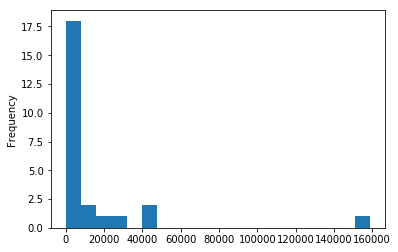

In [75]:
(creddata["obligo"]/1000).plot.hist(bins = 20)

In [78]:
#### parameter ###

# mini-pd-Matrix

pd_dict_bs = {
    11 : 0.005,
    12 : 0.05,
    21 : 0.06,
    22 : 0.09
}

# sektorvarianzen

sektorvarianzen = {
    1 : 0.2,
    2 : 0.05
}

sektorEW = {
    1 : 0.0125,
    2 : 0.075
}

# iterationen

iterationen = 100


In [127]:
### funktion zur erzeugung einer stochastischen Ausfallwahrscheinlichkeit:

#gammashape = k
#gammascale = theta
#mean = k * (1/theta) = k*theta
#standarddeviation = sqrt(k)*theta
k = 0.0125
theta = 1
length = 10
aws = np.random.gamma(k,size=length)

def aws(k,size):
    aws = np.random.gamma(k,size=size)
    return aws

In [129]:
#PD-Feld hizufügen
def pd_func(sek_var):
    pd = np.random.gamma(sek_var)
    return pd

pd_func(sektorvarianzen[1])

creddata["PD"] = 0
creddata["PD"] = creddata.apply(lambda creddata: pd_func(sektorvarianzen[creddata["sektor"]]), axis = 1)

creddata

,date,obligo,boni,sektor,PD
KDNR,,,,,
1,01.01.2001,100000.0,2,2,1.490461e-08
2,01.01.2001,2000000.0,2,1,2.755082e-04
3,01.01.2001,30000000.0,1,1,1.396917e-01
4,01.01.2001,5000000.0,1,2,2.349518e-13
5,01.01.2001,5000000.0,1,2,2.068968e-06
6,01.01.2001,4000000.0,1,2,2.261144e-04
7,01.01.2001,15000000.0,2,2,6.554162e-12
8,01.01.2001,5900000.0,1,2,1.531396e-10
9,01.01.2001,5000000.0,1,2,4.885228e-10


In [130]:
creddata["EL"] = creddata["PD"] * creddata["obligo"]

In [135]:
creddata = creddata.round(4)
creddata["EL"] = creddata["EL"].round(2)

In [136]:
creddata

,date,obligo,boni,sektor,PD,EL
KDNR,,,,,,
1,01.01.2001,100000.0,2,2,0.0000,0.00
2,01.01.2001,2000000.0,2,1,0.0003,551.02
3,01.01.2001,30000000.0,1,1,0.1397,4190750.32
4,01.01.2001,5000000.0,1,2,0.0000,0.00
5,01.01.2001,5000000.0,1,2,0.0000,10.34
6,01.01.2001,4000000.0,1,2,0.0002,904.46
7,01.01.2001,15000000.0,2,2,0.0000,0.00
8,01.01.2001,5900000.0,1,2,0.0000,0.00
9,01.01.2001,5000000.0,1,2,0.0000,0.00


In [144]:
#Erwarteter Gesamtverlust
EL = round(creddata["EL"].sum(),2)

5208373.94


In [140]:
#durchschnittlicher EL
av_EL = round((creddata.EL.sum() / creddata.obligo.sum()),3)
av_EL

0.014

In [182]:
#Zufallszahlen auf KDNR-Ebene generieren (zwischen 0 und 1)
z = pd.Series(np.random.random(25))
z.index = cd_index
z.head()

KDNR
1    0.833367
2    0.467754
3    0.531508
4    0.482938
5    0.659380
dtype: float64

In [183]:
creddata["Z"] = z

In [190]:
#verkürzt:

creddata["Z"] = pd.Series(np.random.random(25))

In [191]:
creddata

,date,obligo,boni,sektor,PD,EL,Z,UL
KDNR,,,,,,,,
1,01.01.2001,100000.0,2,2,0.0000,0.00,0.346602,0.0
2,01.01.2001,2000000.0,2,1,0.0003,551.02,0.364031,0.0
3,01.01.2001,30000000.0,1,1,0.1397,4190750.32,0.465440,0.0
4,01.01.2001,5000000.0,1,2,0.0000,0.00,0.613048,0.0
5,01.01.2001,5000000.0,1,2,0.0000,10.34,0.237796,0.0
6,01.01.2001,4000000.0,1,2,0.0002,904.46,0.629157,0.0
7,01.01.2001,15000000.0,2,2,0.0000,0.00,0.797064,0.0
8,01.01.2001,5900000.0,1,2,0.0000,0.00,0.148335,0.0
9,01.01.2001,5000000.0,1,2,0.0000,0.00,0.388767,0.0


In [192]:
creddata["UL"] = 0
creddata["UL"] = np.where(creddata["PD"] > creddata["Z"], creddata["obligo"], 0)

In [205]:
#verkürzt:

creddata["Z"] = pd.Series(np.random.random(25))
creddata["UL"] = np.where(creddata["PD"] > creddata["Z"], creddata["obligo"], 0)
creddata["UL"].sum()

30300000.0

In [214]:
#schleife:

def simulation(szenarien):
    ergebnisse = []
    for i in range(szenarien):
        creddata["Z"] = pd.Series(np.random.random(25))
        creddata["UL"] = np.where(creddata["PD"] > creddata["Z"], creddata["obligo"], 0)
        outcome = creddata["UL"].sum()
        ergebnisse.append(outcome)
    verteilung = pd.Series(ergebnisse)
    return verteilung

In [218]:
verteilung = simulation(100000)

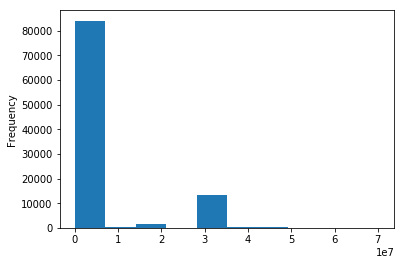

In [219]:
verteilung.plot.hist(bins=10)

In [226]:
UL = verteilung.quantile(0.975)
EL, UL, UL-EL, creddata.obligo.sum(), round((UL-EL)/creddata.obligo.sum(),4)

(5208373.94, 32000000.0, 26791626.06, 360909500.0, 0.0742)